# Ross Island Region Automatic Weather Station (AWS) Climatology

This Jupyter notebook has the code to combine multiple monthly text files for each chosen AWS into one from this website: https://amrc.ssec.wisc.edu/data/ftp/pub/aws/q3h/. Then the large file is read in using pandas so that different graphs and calculations can be done to show some climatological data for the AWS's.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

### Willie Field Climatology

#### Create one large file from monthly data text files

In [2]:
#The following websites were used to help creat this process:
#https://www.geeksforgeeks.org/how-to-read-multiple-data-files-into-pandas/
#https://www.pythontutorial.net/python-basics/python-read-text-file/
#https://www.programiz.com/python-programming/del

path = '/tornado/home1/class/fall18/tnorton2/AOS573/final_data' #the data needed to run this notebook is included in the
    # gitlab, but are also in this directory if issues arise - it is also were the large files are put, so if you
    # need, change the path

file_list = sorted(glob.glob(path + "/wfd20*.txt"))

new_file = open(path + "/wfd_data.txt", "w+")
for i in range(0,len(file_list)):
    old_file = open(file_list[i], "r")
    lines = old_file.readlines()
    old_file.close()
    del lines[1] #removing the first two lines of each file since they are header information
    del lines[0] #and the columns are named as needed in the next step
    for line in lines:
        new_file.write(line)
new_file = open(path + "/wfd_data.txt", "r")
text = new_file.read()

#### Read in large data text file

In [3]:
wfd = pd.read_csv(path + '/wfd_data.txt',sep='\s+',na_values='444.0')
wfd.columns = ['year','julian_day','month','day','time','temp','pres','wd_spd','wd_dir','rh','delta_t']
wfd

year  julian_day  month  day  time  temp    pres  wd_spd  wd_dir    rh  \
0      2015         152      6    1   300 -36.3  1003.0     3.9    58.5  66.2   
1      2015         152      6    1   600 -35.5  1002.2     6.3    88.5  67.3   
2      2015         152      6    1   900 -35.2  1000.9     7.5    86.3  67.1   
3      2015         152      6    1  1200 -33.5  1000.4     7.3    74.5  60.6   
4      2015         152      6    1  1500 -33.4   999.6     9.3    73.0  62.8   
...     ...         ...    ...  ...   ...   ...     ...     ...     ...   ...   
16322  2020         366     12   31   900  -6.9   972.5     9.3   164.8  90.5   
16323  2020         366     12   31  1200  -7.6   973.8     9.2   156.3  88.9   
16324  2020         366     12   31  1500  -8.1   974.0    11.4   145.0  88.9   
16325  2020         366     12   31  1800  -6.9   973.4    10.8   173.1  82.1   
16326  2020         366     12   31  2100  -5.4   975.0     8.3   172.3  76.8   

       delta_t  
0         -0.1  
1         -0.1  
2          0.0  
3          0.2  
4          0.2  
...        ...  
16322      0.0  
16323     -0.3  
16324      0.2  
16325      0.3  
16326      0.3  

[16327 rows x 11 columns]

#### Index data using pd.to_datetime and set it to the data

In [4]:
new_index=pd.to_datetime(wfd[['year', 'month', 'day']])

In [5]:
df_wfd = wfd.set_index(new_index)
df_wfd

year  julian_day  month  day  time  temp    pres  wd_spd  wd_dir  \
2015-06-01  2015         152      6    1   300 -36.3  1003.0     3.9    58.5   
2015-06-01  2015         152      6    1   600 -35.5  1002.2     6.3    88.5   
2015-06-01  2015         152      6    1   900 -35.2  1000.9     7.5    86.3   
2015-06-01  2015         152      6    1  1200 -33.5  1000.4     7.3    74.5   
2015-06-01  2015         152      6    1  1500 -33.4   999.6     9.3    73.0   
...          ...         ...    ...  ...   ...   ...     ...     ...     ...   
2020-12-31  2020         366     12   31   900  -6.9   972.5     9.3   164.8   
2020-12-31  2020         366     12   31  1200  -7.6   973.8     9.2   156.3   
2020-12-31  2020         366     12   31  1500  -8.1   974.0    11.4   145.0   
2020-12-31  2020         366     12   31  1800  -6.9   973.4    10.8   173.1   
2020-12-31  2020         366     12   31  2100  -5.4   975.0     8.3   172.3   

              rh  delta_t  
2015-06-01  66.2     -0.1  
2015-06-01  67.3     -0.1  
2015-06-01  67.1      0.0  
2015-06-01  60.6      0.2  
2015-06-01  62.8      0.2  
...          ...      ...  
2020-12-31  90.5      0.0  
2020-12-31  88.9     -0.3  
2020-12-31  88.9      0.2  
2020-12-31  82.1      0.3  
2020-12-31  76.8      0.3  

[16327 rows x 11 columns]

#### Plot Temperature, Pressure, Wind Speed, Wind Direction, and Relative Humidity time series as their own graph using subplot

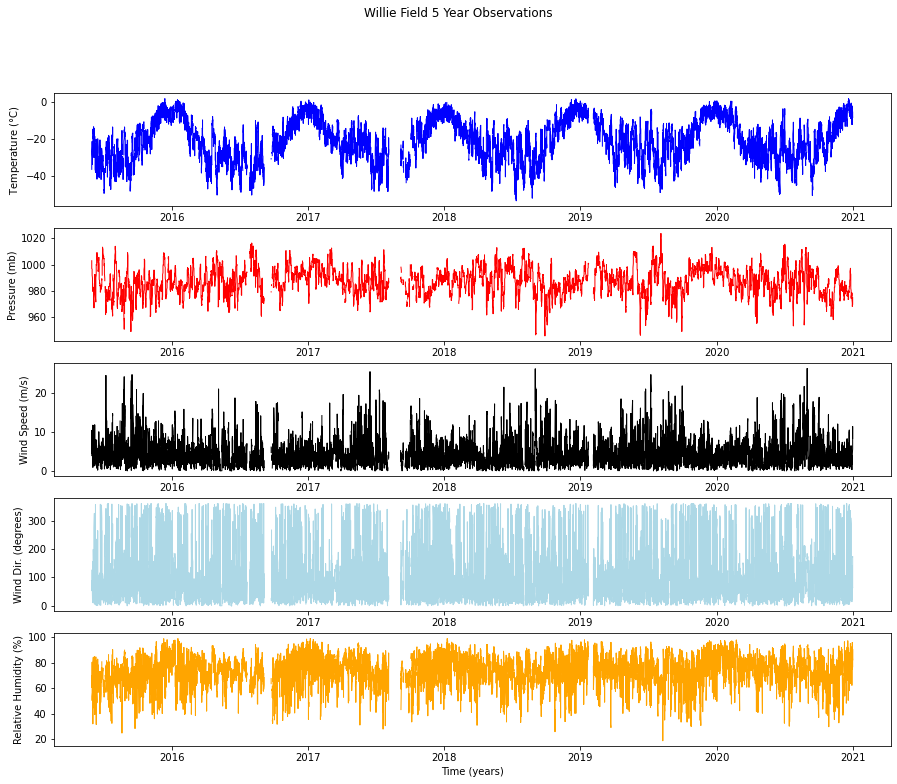

In [6]:
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,12)
ax[0].plot(df_wfd['temp'],color='blue',lw=1)
ax[1].plot(df_wfd['pres'],color='red',lw=1)
ax[2].plot(df_wfd['wd_spd'],color='black',lw=1)
ax[3].plot(df_wfd['wd_dir'],color='lightblue',lw=1)
ax[4].plot(df_wfd['rh'],color='orange',lw=1)

plt.suptitle('Willie Field 5 Year Observations')
plt.xlabel('Time (years)')
ax[0].set_ylabel('Temperature ($\degree$C)')
ax[1].set_ylabel('Pressure (mb)')
ax[2].set_ylabel('Wind Speed (m/s)')
ax[3].set_ylabel('Wind Dir. (degrees)')
ax[4].set_ylabel('Relative Humidity (%)');

#### Use groupby to calculate the monthly mean over all 5 years

In [7]:
wfd_climo = df_wfd.groupby(df_wfd.month).mean()
wfd_climo

year  julian_day        day         time       temp        pres  \
month                                                                           
1      2018.000000   16.000000  16.000000  1050.000000  -5.720642  990.739674   
2      2018.000000   45.704225  14.704225  1050.000000 -12.038532  989.377880   
3      2018.000000   75.400000  16.000000  1050.000000 -20.823178  988.555700   
4      2018.000000  105.900000  15.500000  1050.000000 -26.153761  989.197806   
5      2018.000000  136.400000  16.000000  1050.000000 -25.319113  987.428329   
6      2017.501737  166.843641  15.510076  1050.729673 -27.633333  986.179930   
7      2017.500000  197.333333  16.000000  1050.000000 -29.983333  988.594587   
8      2017.500000  228.333333  16.000000  1050.000000 -29.070625  990.332858   
9      2017.500000  258.833333  15.500000  1050.000000 -28.956479  982.135587   
10     2017.500000  289.333333  16.000000  1050.000000 -20.071938  983.040725   
11     2017.500000  319.833333  15.500000  1050.000000 -12.399160  985.939375   
12     2017.500000  350.333333  16.000000  1050.000000  -5.582300  989.194683   

         wd_spd      wd_dir         rh   delta_t  
month                                             
1      3.900428   96.097772  81.303685  0.144730  
2      4.046484   82.831963  75.633333  0.491050  
3      4.716612   73.300244  75.373860  0.718730  
4      3.892550   92.139439  75.062025  1.834093  
5      3.962359  100.176010  75.294677  1.673306  
6      4.793614   93.942947  70.940912  1.387719  
7      4.422934   90.684402  69.621296  1.816382  
8      5.175696   97.624877  72.153444  1.705938  
9      5.129262   95.829626  69.292724  1.631317  
10     5.000210  104.656014  71.120851  0.859693  
11     3.911389  102.098681  71.975208  0.453958  
12     3.846489  109.341104  78.357192  0.080164

#### Find all time maximums for temperature, pressure, wind speed and relative humidity

In [8]:
print(str(df_wfd.temp.max()) + " degrees C")
print(str(df_wfd.pres.max()) + " mb")
print(str(df_wfd.wd_spd.max()) + " m/s")
print(str(df_wfd.rh.max()) + " %")

1.9 degrees C
1023.6 mb
26.3 m/s
99.0 %


#### Find all time minimums for temperature, pressure, wind speed and relative humidity

In [9]:
print(str(df_wfd.temp.min()) + " degrees C")
print(str(df_wfd.pres.min()) + " mb")
print(str(df_wfd.wd_spd.min()) + " m/s")
print(str(df_wfd.rh.min()) + " %")

-53.3 degrees C
946.0 mb
0.0 m/s
18.8 %


### Windless Bight Climatology

#### Create one large file from monthly data text files

This and the following code segments that create the larger 5 years of data text file are commented out so there aren't hundreds of files to copy over. Also, Windless Bight and Cape Bird had months of missing data and I manually added in the nan value that is used in these files (444.0) so that is was properly shown and handled with pandas and using pd.to_datetime indexing.

In [31]:
# path = '/tornado/home1/class/fall18/tnorton2/AOS573/final_data'
# file_list = sorted(glob.glob(path + "/wdb20*.txt"))
    
# new_file = open(path + "/wdb_data.txt", "w+")
# for i in range(0,len(file_list)):
#     old_file = open(file_list[i], "r")
#     lines = old_file.readlines()
#     old_file.close()
#     del lines[1]
#     del lines[0]
#     for line in lines:
#         new_file.write(line)
# new_file = open(path + "/wdb_data.txt", "r")
# text = new_file.read()

#### Read in large data text file

In [10]:
wdb = pd.read_csv(path + '/wdb_data.txt',sep='\s+',na_values='444.0')
wdb.columns = ['year','julian_day','month','day','time','temp','pres','wd_spd','wd_dir','rh','delta_t']
wdb

year  julian_day  month   day    time  temp   pres  wd_spd  wd_dir  \
0      2015.0       152.0    6.0   1.0   300.0 -35.8  998.9     3.4    40.0   
1      2015.0       152.0    6.0   1.0   600.0 -35.0  998.5     6.3    90.3   
2      2015.0       152.0    6.0   1.0   900.0 -34.3  997.8     7.0    94.0   
3      2015.0       152.0    6.0   1.0  1200.0 -32.6  996.3     7.7    79.3   
4      2015.0       152.0    6.0   1.0  1500.0 -30.8  995.8    10.4    85.0   
...       ...         ...    ...   ...     ...   ...    ...     ...     ...   
16322  2020.0       366.0   12.0  31.0   900.0  -6.6  969.1     1.3   165.5   
16323  2020.0       366.0   12.0  31.0  1200.0  -7.6  969.6     1.4   199.8   
16324  2020.0       366.0   12.0  31.0  1500.0  -8.3  969.6     3.7    18.1   
16325  2020.0       366.0   12.0  31.0  1800.0  -7.6  970.0     3.5   344.8   
16326  2020.0       366.0   12.0  31.0  2100.0  -6.7  970.6     3.2    37.8   

          rh  delta_t  
0       69.6     -0.1  
1       70.1     -0.1  
2       69.4      0.3  
3       63.8      0.6  
4       65.0      0.2  
...      ...      ...  
16322   97.5      0.0  
16323  100.0      0.0  
16324   99.9      0.1  
16325   99.9     -0.1  
16326   99.9     -0.0  

[16327 rows x 11 columns]

#### Index data using pd.to_datetime from Willie Field and set it to the Windless Bight data

In [11]:
df_wdb = wdb.set_index(new_index)
df_wdb

year  julian_day  month   day    time  temp   pres  wd_spd  \
2015-06-01  2015.0       152.0    6.0   1.0   300.0 -35.8  998.9     3.4   
2015-06-01  2015.0       152.0    6.0   1.0   600.0 -35.0  998.5     6.3   
2015-06-01  2015.0       152.0    6.0   1.0   900.0 -34.3  997.8     7.0   
2015-06-01  2015.0       152.0    6.0   1.0  1200.0 -32.6  996.3     7.7   
2015-06-01  2015.0       152.0    6.0   1.0  1500.0 -30.8  995.8    10.4   
...            ...         ...    ...   ...     ...   ...    ...     ...   
2020-12-31  2020.0       366.0   12.0  31.0   900.0  -6.6  969.1     1.3   
2020-12-31  2020.0       366.0   12.0  31.0  1200.0  -7.6  969.6     1.4   
2020-12-31  2020.0       366.0   12.0  31.0  1500.0  -8.3  969.6     3.7   
2020-12-31  2020.0       366.0   12.0  31.0  1800.0  -7.6  970.0     3.5   
2020-12-31  2020.0       366.0   12.0  31.0  2100.0  -6.7  970.6     3.2   

            wd_dir     rh  delta_t  
2015-06-01    40.0   69.6     -0.1  
2015-06-01    90.3   70.1     -0.1  
2015-06-01    94.0   69.4      0.3  
2015-06-01    79.3   63.8      0.6  
2015-06-01    85.0   65.0      0.2  
...            ...    ...      ...  
2020-12-31   165.5   97.5      0.0  
2020-12-31   199.8  100.0      0.0  
2020-12-31    18.1   99.9      0.1  
2020-12-31   344.8   99.9     -0.1  
2020-12-31    37.8   99.9     -0.0  

[16327 rows x 11 columns]

#### Plot Temperature, Pressure, Wind Speed, Wind Direction, and Relative Humidity time series as their own graph using subplot

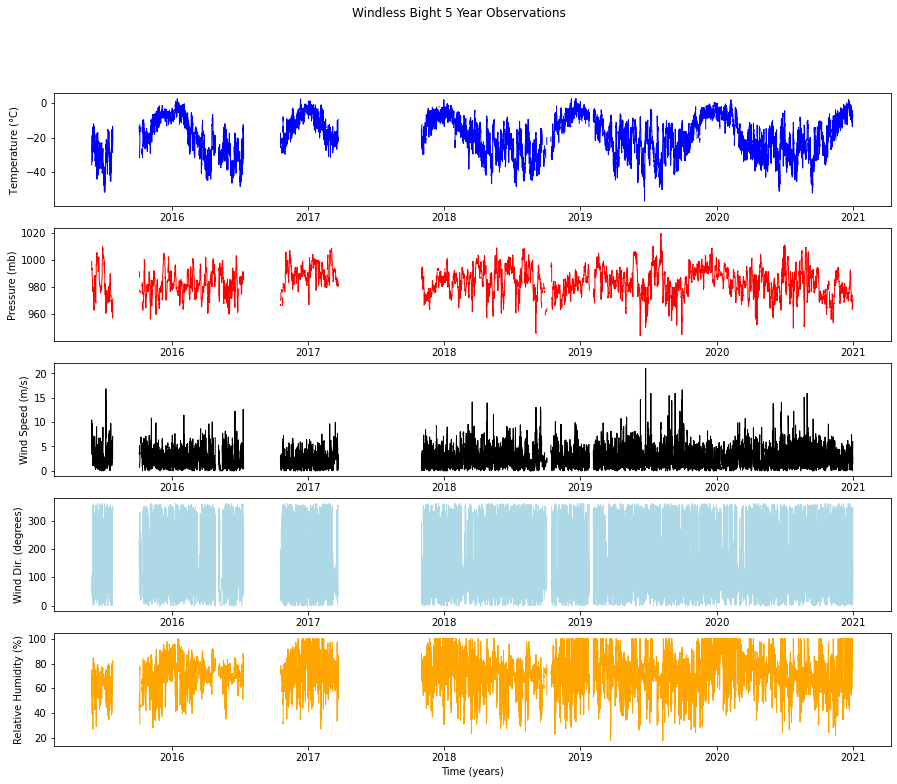

In [12]:
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,12)
ax[0].plot(df_wdb['temp'],color='blue',lw=1)
ax[1].plot(df_wdb['pres'],color='red',lw=1)
ax[2].plot(df_wdb['wd_spd'],color='black',lw=1)
ax[3].plot(df_wdb['wd_dir'],color='lightblue',lw=1)
ax[4].plot(df_wdb['rh'],color='orange',lw=1)

plt.suptitle('Windless Bight 5 Year Observations')
plt.xlabel('Time (years)')
ax[0].set_ylabel('Temperature ($\degree$C)')
ax[1].set_ylabel('Pressure (mb)')
ax[2].set_ylabel('Wind Speed (m/s)')
ax[3].set_ylabel('Wind Dir. (degrees)')
ax[4].set_ylabel('Relative Humidity (%)');

#### Use groupby to calculate the monthly mean over all 5 years

In [13]:
wdb_climo = df_wdb.groupby(df_wdb.month).mean()
wdb_climo

year  julian_day        day        time       temp        pres  \
month                                                                          
1.0    2018.000000   16.000000  16.000000  1050.00000  -5.893214  986.902807   
2.0    2018.000000   45.704225  14.704225  1050.00000 -12.204015  984.835909   
3.0    2018.000000   75.400000  16.000000  1050.00000 -20.929365  984.246644   
4.0    2018.250000  106.000000  15.500000  1050.00000 -26.315744  985.337446   
5.0    2018.250000  136.500000  16.000000  1050.00000 -25.541711  984.379514   
6.0    2017.602168  166.912427  15.512093  1050.87573 -27.373832  982.084282   
7.0    2017.600000  197.400000  16.000000  1050.00000 -29.460383  984.988421   
8.0    2019.000000  228.333333  16.000000  1050.00000 -27.344220  987.631586   
9.0    2019.000000  258.833333  15.500000  1050.00000 -27.574189  979.414769   
10.0   2017.600000  289.400000  16.000000  1050.00000 -20.253488  978.139423   
11.0   2017.500000  319.833333  15.500000  1050.00000 -12.446980  981.728631   
12.0   2017.500000  350.333333  16.000000  1050.00000  -6.072804  985.192843   

         wd_spd      wd_dir         rh   delta_t  
month                                             
1.0    2.228584  131.499828  83.570077  0.130901  
2.0    2.564091  140.087364  74.784230  0.671182  
3.0    3.141824  121.645525  73.781411  0.952926  
4.0    2.557667  145.758667  73.135837  2.030687  
5.0    2.477167  149.373890  73.570644  2.047624  
6.0    2.935854  149.578165  68.972727  1.813679  
7.0    2.867560  134.317608  69.176651  2.280861  
8.0    3.010027  151.342033  72.144892  1.490995  
9.0    3.233385  145.563692  68.479231  1.589692  
10.0   2.807332  146.403966  67.129603  1.183173  
11.0   2.364976  152.059764  68.952120  0.914177  
12.0   2.191002  149.603476  79.172927  0.209066

#### Find all time maximums for temperature, pressure, wind speed and relative humidity

In [14]:
print(str(df_wdb.temp.max()) + " degrees C")
print(str(df_wdb.pres.max()) + " mb")
print(str(df_wdb.wd_spd.max()) + " m/s")
print(str(df_wdb.rh.max()) + " %")

2.5 degrees C
1019.5 mb
21.0 m/s
100.2 %


#### Find all time minimums for temperature, pressure, wind speed and relative humidity

In [15]:
print(str(df_wdb.temp.min()) + " degrees C")
print(str(df_wdb.pres.min()) + " mb")
print(str(df_wdb.wd_spd.min()) + " m/s")
print(str(df_wdb.rh.min()) + " %")

-56.6 degrees C
943.8 mb
0.0 m/s
17.8 %


### Ferrell Climatology

In [ ]:
# path = '/tornado/home1/class/fall18/tnorton2/AOS573/final_data'
# file_list = sorted(glob.glob(path + "/fer20*.txt"))
    
# new_file = open(path + "/fer_data.txt", "w+")
# for i in range(0,len(file_list)):
#     old_file = open(file_list[i], "r")
#     lines = old_file.readlines()
#     old_file.close()
#     del lines[1]
#     del lines[0]
#     for line in lines:
#         new_file.write(line)
# new_file = open(path + "/fer_data.txt", "r")
# text = new_file.read()

#### Read in large data text file

In [16]:
fer = pd.read_csv(path + '/fer_data.txt',sep='\s+',na_values='444.0')
fer.columns = ['year','julian_day','month','day','time','temp','pres','wd_spd','wd_dir','rh','delta_t']
fer

year  julian_day  month  day  time  temp   pres  wd_spd  wd_dir    rh  \
0      2015         152      6    1   300 -35.1  996.7     8.9   190.0  70.0   
1      2015         152      6    1   600 -34.2  995.6     8.7   186.0  70.7   
2      2015         152      6    1   900 -35.0  994.6     8.1   194.0  70.0   
3      2015         152      6    1  1200 -33.7  993.1     9.6   188.0  71.2   
4      2015         152      6    1  1500 -32.9  991.7    11.4   193.0  72.0   
...     ...         ...    ...  ...   ...   ...    ...     ...     ...   ...   
16322  2020         366     12   31   900  -6.5  964.8    13.3   204.0  94.0   
16323  2020         366     12   31  1200  -7.6  965.5    14.9   197.0  94.0   
16324  2020         366     12   31  1500  -8.5  966.2    14.9   210.0  93.0   
16325  2020         366     12   31  1800  -8.0  966.2    14.7   208.0  93.0   
16326  2020         366     12   31  2100  -7.2  966.6    13.5   201.0  93.8   

       delta_t  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
16322      NaN  
16323      NaN  
16324      NaN  
16325      NaN  
16326      NaN  

[16327 rows x 11 columns]

#### Index data using pd.to_datetime from Willie Field and set it to the Ferrell data

In [17]:
df_fer = fer.set_index(new_index)
df_fer

year  julian_day  month  day  time  temp   pres  wd_spd  wd_dir  \
2015-06-01  2015         152      6    1   300 -35.1  996.7     8.9   190.0   
2015-06-01  2015         152      6    1   600 -34.2  995.6     8.7   186.0   
2015-06-01  2015         152      6    1   900 -35.0  994.6     8.1   194.0   
2015-06-01  2015         152      6    1  1200 -33.7  993.1     9.6   188.0   
2015-06-01  2015         152      6    1  1500 -32.9  991.7    11.4   193.0   
...          ...         ...    ...  ...   ...   ...    ...     ...     ...   
2020-12-31  2020         366     12   31   900  -6.5  964.8    13.3   204.0   
2020-12-31  2020         366     12   31  1200  -7.6  965.5    14.9   197.0   
2020-12-31  2020         366     12   31  1500  -8.5  966.2    14.9   210.0   
2020-12-31  2020         366     12   31  1800  -8.0  966.2    14.7   208.0   
2020-12-31  2020         366     12   31  2100  -7.2  966.6    13.5   201.0   

              rh  delta_t  
2015-06-01  70.0      NaN  
2015-06-01  70.7      NaN  
2015-06-01  70.0      NaN  
2015-06-01  71.2      NaN  
2015-06-01  72.0      NaN  
...          ...      ...  
2020-12-31  94.0      NaN  
2020-12-31  94.0      NaN  
2020-12-31  93.0      NaN  
2020-12-31  93.0      NaN  
2020-12-31  93.8      NaN  

[16327 rows x 11 columns]

#### Plot Temperature, Pressure, Wind Speed, Wind Direction, and Relative Humidity time series as their own graph using subplot

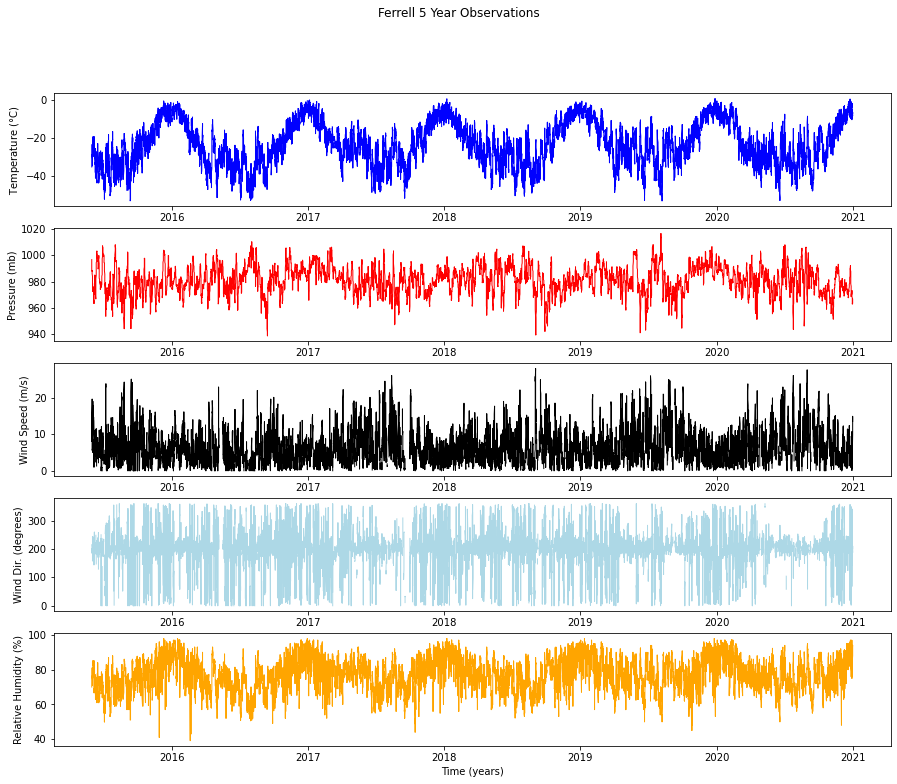

In [18]:
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,12)
ax[0].plot(df_fer['temp'],color='blue',lw=1)
ax[1].plot(df_fer['pres'],color='red',lw=1)
ax[2].plot(df_fer['wd_spd'],color='black',lw=1)
ax[3].plot(df_fer['wd_dir'],color='lightblue',lw=1)
ax[4].plot(df_fer['rh'],color='orange',lw=1)

plt.suptitle('Ferrell 5 Year Observations')
plt.xlabel('Time (years)')
ax[0].set_ylabel('Temperature ($\degree$C)')
ax[1].set_ylabel('Pressure (mb)')
ax[2].set_ylabel('Wind Speed (m/s)')
ax[3].set_ylabel('Wind Dir. (degrees)')
ax[4].set_ylabel('Relative Humidity (%)');

#### Use groupby to calculate the monthly mean over all 5 years

In [19]:
fer_climo = df_fer.groupby(df_fer.month).mean()
fer_climo

year  julian_day        day         time       temp        pres  \
month                                                                           
1      2018.000000   16.000000  16.000000  1050.000000  -7.123239  985.291613   
2      2018.000000   45.704225  14.704225  1050.000000 -13.739876  983.600352   
3      2018.000000   75.400000  16.000000  1050.000000 -22.590696  982.591532   
4      2018.000000  105.900000  15.500000  1050.000000 -28.636842  983.234917   
5      2018.000000  136.400000  16.000000  1050.000000 -27.734274  981.413548   
6      2017.501737  166.843641  15.510076  1050.729673 -31.198749  979.750174   
7      2017.500000  197.333333  16.000000  1050.000000 -33.174059  982.574664   
8      2017.500000  228.333333  16.000000  1050.000000 -31.865568  982.365054   
9      2017.500000  258.833333  15.500000  1050.000000 -32.232892  975.475417   
10     2017.500000  289.333333  16.000000  1050.000000 -22.884008  977.086156   
11     2017.500000  319.833333  15.500000  1050.000000 -14.906513  980.347222   
12     2017.500000  350.333333  16.000000  1050.000000  -7.043324  983.945192   

         wd_spd      wd_dir         rh  delta_t  
month                                            
1      5.176048  178.975806  88.110323      NaN  
2      5.618398  188.117958  81.883099      NaN  
3      6.570915  187.076797  78.865000      NaN  
4      5.644354  205.545619  75.613417      NaN  
5      7.316618  206.647001  76.608710      NaN  
6      7.837034  201.860364  73.098749      NaN  
7      7.158787  198.982425  71.328763      NaN  
8      8.238330  204.702726  72.761358      NaN  
9      8.127447  199.177598  72.012292      NaN  
10     7.124228  207.558682  77.109207      NaN  
11     5.486250  195.398611  80.399028      NaN  
12     4.881372  185.939475  85.832997      NaN

#### Find all time maximums for temperature, pressure, wind speed and relative humidity

In [20]:
print(str(df_fer.temp.max()) + " degrees C")
print(str(df_fer.pres.max()) + " mb")
print(str(df_fer.wd_spd.max()) + " m/s")
print(str(df_fer.rh.max()) + " %")

0.6 degrees C
1016.5 mb
28.0 m/s
98.0 %


#### Find all time minimums for temperature, pressure, wind speed and relative humidity

In [21]:
print(str(df_fer.temp.min()) + " degrees C")
print(str(df_fer.pres.min()) + " mb")
print(str(df_fer.wd_spd.min()) + " m/s")
print(str(df_fer.rh.min()) + " %")

-52.8 degrees C
938.8 mb
0.0 m/s
39.1 %


### Cape Bird Climatology

In [ ]:
# path = '/tornado/home1/class/fall18/tnorton2/AOS573/final_data'
# file_list = sorted(glob.glob(path + "/cbd20*.txt"))
    
# new_file = open(path + "/cbd_data.txt", "w+")
# for i in range(0,len(file_list)):
#     old_file = open(file_list[i], "r")
#     lines = old_file.readlines()
#     old_file.close()
#     del lines[1]
#     del lines[0]
#     for line in lines:
#         new_file.write(line)
# new_file = open(path + "/cbd_data.txt", "r")
# text = new_file.read()

#### Read in large data text file

In [22]:
cbd = pd.read_csv(path + '/cbd_data.txt',sep='\s+',na_values='444.0')
cbd.columns = ['year','julian_day','month','day','time','temp','pres','wd_spd','wd_dir','rh','delta_t']
cbd

year  julian_day  month   day    time  temp   pres  wd_spd  wd_dir  \
0      2015.0       152.0    6.0   1.0   300.0 -28.3  996.7     5.8   174.2   
1      2015.0       152.0    6.0   1.0   600.0 -28.5  994.2     5.0    78.4   
2      2015.0       152.0    6.0   1.0   900.0 -27.4  993.1     5.1    90.2   
3      2015.0       152.0    6.0   1.0  1200.0 -27.6  991.0     3.2    79.7   
4      2015.0       152.0    6.0   1.0  1500.0 -27.7  990.1     8.1    64.3   
...       ...         ...    ...   ...     ...   ...    ...     ...     ...   
16322  2020.0       366.0   12.0  31.0   900.0  -2.9  963.8     9.2   204.8   
16323  2020.0       366.0   12.0  31.0  1200.0  -1.3  965.2     1.6   330.1   
16324  2020.0       366.0   12.0  31.0  1500.0  -2.7  966.8     7.6   202.7   
16325  2020.0       366.0   12.0  31.0  1800.0  -2.8  967.2     4.5   204.3   
16326  2020.0       366.0   12.0  31.0  2100.0  -2.9  967.8     8.6   192.7   

         rh  delta_t  
0      69.1      NaN  
1      64.2      NaN  
2      51.6      NaN  
3      58.9      NaN  
4      64.3      NaN  
...     ...      ...  
16322  54.8      NaN  
16323  55.4      NaN  
16324  55.2      NaN  
16325  55.9      NaN  
16326  54.1      NaN  

[16327 rows x 11 columns]

#### Index data using pd.to_datetime from Willie Field and set it to the Cape Bird data

In [23]:
df_cbd = cbd.set_index(new_index)
df_cbd

year  julian_day  month   day    time  temp   pres  wd_spd  \
2015-06-01  2015.0       152.0    6.0   1.0   300.0 -28.3  996.7     5.8   
2015-06-01  2015.0       152.0    6.0   1.0   600.0 -28.5  994.2     5.0   
2015-06-01  2015.0       152.0    6.0   1.0   900.0 -27.4  993.1     5.1   
2015-06-01  2015.0       152.0    6.0   1.0  1200.0 -27.6  991.0     3.2   
2015-06-01  2015.0       152.0    6.0   1.0  1500.0 -27.7  990.1     8.1   
...            ...         ...    ...   ...     ...   ...    ...     ...   
2020-12-31  2020.0       366.0   12.0  31.0   900.0  -2.9  963.8     9.2   
2020-12-31  2020.0       366.0   12.0  31.0  1200.0  -1.3  965.2     1.6   
2020-12-31  2020.0       366.0   12.0  31.0  1500.0  -2.7  966.8     7.6   
2020-12-31  2020.0       366.0   12.0  31.0  1800.0  -2.8  967.2     4.5   
2020-12-31  2020.0       366.0   12.0  31.0  2100.0  -2.9  967.8     8.6   

            wd_dir    rh  delta_t  
2015-06-01   174.2  69.1      NaN  
2015-06-01    78.4  64.2      NaN  
2015-06-01    90.2  51.6      NaN  
2015-06-01    79.7  58.9      NaN  
2015-06-01    64.3  64.3      NaN  
...            ...   ...      ...  
2020-12-31   204.8  54.8      NaN  
2020-12-31   330.1  55.4      NaN  
2020-12-31   202.7  55.2      NaN  
2020-12-31   204.3  55.9      NaN  
2020-12-31   192.7  54.1      NaN  

[16327 rows x 11 columns]

#### Plot Temperature, Pressure, Wind Speed, Wind Direction, and Relative Humidity time series as their own graph using subplot

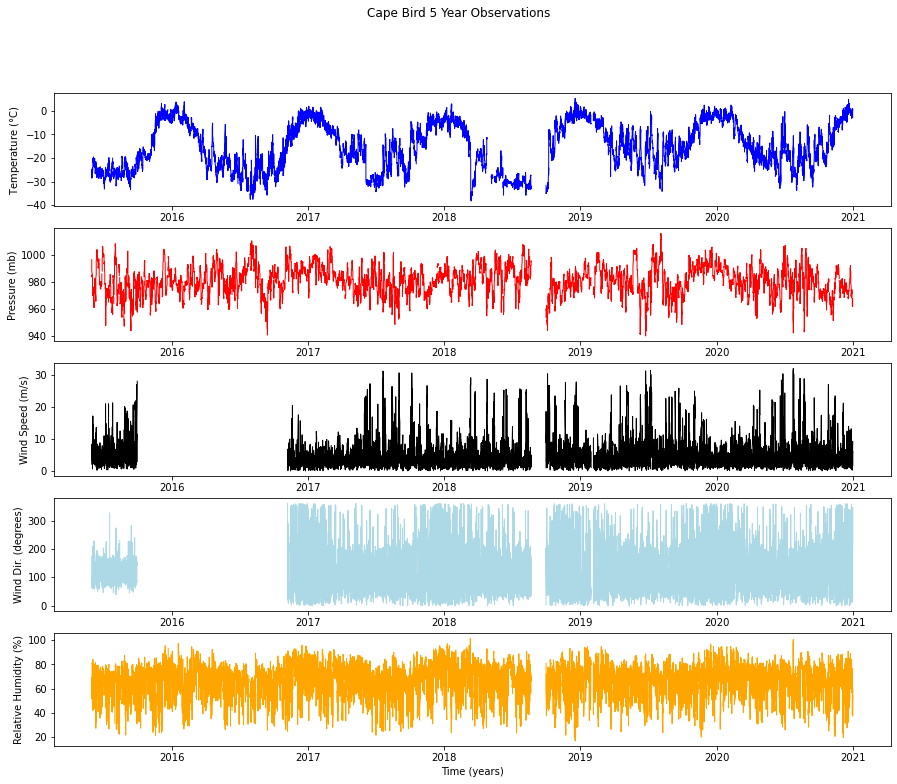

In [24]:
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,12)
ax[0].plot(df_cbd['temp'],color='blue',lw=1)
ax[1].plot(df_cbd['pres'],color='red',lw=1)
ax[2].plot(df_cbd['wd_spd'],color='black',lw=1)
ax[3].plot(df_cbd['wd_dir'],color='lightblue',lw=1)
ax[4].plot(df_cbd['rh'],color='orange',lw=1)

plt.suptitle('Cape Bird 5 Year Observations')
plt.xlabel('Time (years)')
ax[0].set_ylabel('Temperature ($\degree$C)')
ax[1].set_ylabel('Pressure (mb)')
ax[2].set_ylabel('Wind Speed (m/s)')
ax[3].set_ylabel('Wind Dir. (degrees)')
ax[4].set_ylabel('Relative Humidity (%)');

#### Use groupby to calculate the monthly mean over all 5 years

In [25]:
cbd_climo = df_cbd.groupby(df_cbd.month).mean()
cbd_climo

year  julian_day        day         time       temp        pres  \
month                                                                           
1.0    2018.000000   16.000000  16.000000  1050.000000  -2.484590  985.449877   
2.0    2018.000000   45.704225  14.704225  1050.000000  -5.012193  983.574592   
3.0    2018.000000   75.400000  16.000000  1050.000000 -14.193084  981.803815   
4.0    2018.000000  105.900000  15.500000  1050.000000 -18.849216  983.593586   
5.0    2018.000000  136.400000  16.000000  1050.000000 -19.810764  981.811452   
6.0    2017.501737  166.843641  15.510076  1050.729673 -24.786236  979.682022   
7.0    2017.500000  197.333333  16.000000  1050.000000 -24.788036  982.435685   
8.0    2017.500000  228.333333  16.000000  1050.000000 -23.442908  981.949570   
9.0    2017.400000  258.900000  15.500000  1050.000000 -22.768948  975.993656   
10.0   2017.500000  289.333333  16.000000  1050.000000 -17.297481  976.799525   
11.0   2017.500000  319.833333  15.500000  1050.000000  -8.415170  980.587283   
12.0   2017.500000  350.333333  16.000000  1050.000000  -2.578990  984.271643   

         wd_spd      wd_dir         rh  delta_t  
month                                            
1.0    3.729333  108.218974  72.187326      NaN  
2.0    3.705402  129.279540  65.223866      NaN  
3.0    4.506606  117.564329  71.061445      NaN  
4.0    4.210688  118.563810  67.087848      NaN  
5.0    4.765726  108.971774  68.965645      NaN  
6.0    5.688787  111.858577  65.859059      NaN  
7.0    5.435732  112.770564  65.150899      NaN  
8.0    5.424587  112.687142  66.025788      NaN  
9.0    5.401043  116.089051  63.914858      NaN  
10.0   5.606599  116.009848  65.323270      NaN  
11.0   4.914860  122.806206  66.396384      NaN  
12.0   4.384528  142.934121  70.643831      NaN

#### Find all time maximums for temperature, pressure, wind speed and relative humidity

In [26]:
print(str(df_cbd.temp.max()) + " degrees C")
print(str(df_cbd.pres.max()) + " mb")
print(str(df_cbd.wd_spd.max()) + " m/s")
print(str(df_cbd.rh.max()) + " %")

5.2 degrees C
1016.0 mb
32.0 m/s
101.5 %


#### Find all time minimums for temperature, pressure, wind speed and relative humidity

In [27]:
print(str(df_cbd.temp.min()) + " degrees C")
print(str(df_cbd.pres.min()) + " mb")
print(str(df_cbd.wd_spd.min()) + " m/s")
print(str(df_cbd.rh.min()) + " %")

-38.2 degrees C
940.4 mb
0.0 m/s
16.9 %


### Comparisons

Plot the monthly mean from the 5 year calculation for Temperature, Pressure, Wind Speed, Wind Direction, and Relative Humidity as theor own graph, including each station per graph.

Text(0, 0.5, 'RH (%)')

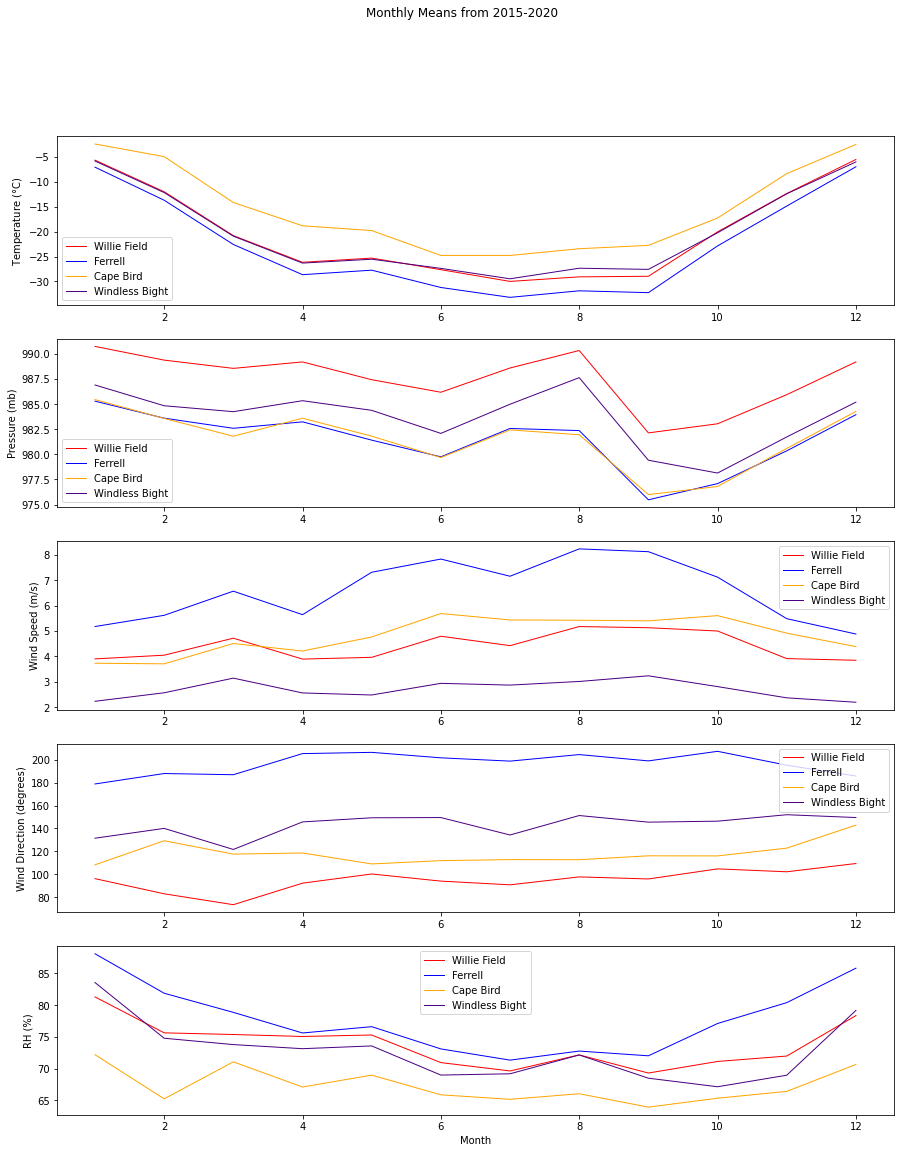

In [28]:
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,18)
ax[0].plot(wfd_climo['temp'],color='red',lw=1, label='Willie Field')
ax[0].plot(fer_climo['temp'],color='blue',lw=1, label='Ferrell')
ax[0].plot(cbd_climo['temp'],color='orange',lw=1, label='Cape Bird')
ax[0].plot(wdb_climo['temp'],color='indigo',lw=1, label='Windless Bight')
ax[0].legend()
plt.suptitle('Monthly Means from 2015-2020')
plt.xlabel('Month')
ax[0].set_ylabel('Temperature ($\degree$C)')

ax[1].plot(wfd_climo['pres'],color='red',lw=1, label='Willie Field')
ax[1].plot(fer_climo['pres'],color='blue',lw=1, label='Ferrell')
ax[1].plot(cbd_climo['pres'],color='orange',lw=1, label='Cape Bird')
ax[1].plot(wdb_climo['pres'],color='indigo',lw=1, label='Windless Bight')
ax[1].legend()
ax[1].set_ylabel('Pressure (mb)')

ax[2].plot(wfd_climo['wd_spd'],color='red',lw=1, label='Willie Field')
ax[2].plot(fer_climo['wd_spd'],color='blue',lw=1, label='Ferrell')
ax[2].plot(cbd_climo['wd_spd'],color='orange',lw=1, label='Cape Bird')
ax[2].plot(wdb_climo['wd_spd'],color='indigo',lw=1, label='Windless Bight')
ax[2].legend()
ax[2].set_ylabel('Wind Speed (m/s)');

ax[3].plot(wfd_climo['wd_dir'],color='red',lw=1, label='Willie Field')
ax[3].plot(fer_climo['wd_dir'],color='blue',lw=1, label='Ferrell')
ax[3].plot(cbd_climo['wd_dir'],color='orange',lw=1, label='Cape Bird')
ax[3].plot(wdb_climo['wd_dir'],color='indigo',lw=1, label='Windless Bight')
ax[3].legend()
ax[3].set_ylabel('Wind Direction (degrees)');

ax[4].plot(wfd_climo['rh'],color='red',lw=1, label='Willie Field')
ax[4].plot(fer_climo['rh'],color='blue',lw=1, label='Ferrell')
ax[4].plot(cbd_climo['rh'],color='orange',lw=1, label='Cape Bird')
ax[4].plot(wdb_climo['rh'],color='indigo',lw=1, label='Windless Bight')
ax[4].legend()
ax[4].set_ylabel('RH (%)')



#### Find all time maximums for temperature, pressure, wind speed and relative humidity

In [29]:
max_data = {'max_temp':[df_wfd.temp.max(),df_wdb.temp.max(),df_fer.temp.max(),df_cbd.temp.max()],
        'max_pres':[df_wfd.pres.max(),df_wdb.pres.max(),df_fer.pres.max(),df_cbd.pres.max()],
        'max_wd_spd':[df_wfd.wd_spd.max(),df_wdb.wd_spd.max(),df_fer.wd_spd.max(),df_cbd.wd_spd.max()],
        'max_rh':[df_wfd.rh.max(),df_wdb.rh.max(),df_fer.rh.max(),df_cbd.rh.max()]}
aws_max = pd.DataFrame(max_data, index=['WFD', 'WDB', 'FER', 'CBD'])
aws_max

max_temp  max_pres  max_wd_spd  max_rh
WFD       1.9    1023.6        26.3    99.0
WDB       2.5    1019.5        21.0   100.2
FER       0.6    1016.5        28.0    98.0
CBD       5.2    1016.0        32.0   101.5

#### Find all time minimums for temperature, pressure, wind speed and relative humidity

In [30]:
min_data = {'min_temp':[df_wfd.temp.min(),df_wdb.temp.min(),df_fer.temp.min(),df_cbd.temp.min()],
        'min_pres':[df_wfd.pres.min(),df_wdb.pres.min(),df_fer.pres.min(),df_cbd.pres.min()],
        'min_wd_spd':[df_wfd.wd_spd.min(),df_wdb.wd_spd.min(),df_fer.wd_spd.min(),df_cbd.wd_spd.min()],
        'min_rh':[df_wfd.rh.min(),df_wdb.rh.min(),df_fer.rh.min(),df_cbd.rh.min()]}
aws_min = pd.DataFrame(min_data, index=['WFD', 'WDB', 'FER', 'CBD'])
aws_min

min_temp  min_pres  min_wd_spd  min_rh
WFD     -53.3     946.0         0.0    18.8
WDB     -56.6     943.8         0.0    17.8
FER     -52.8     938.8         0.0    39.1
CBD     -38.2     940.4         0.0    16.9